In [1]:
!pip install wandb


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import wandb
from wandb.keras import WandbCallback
wandb.login()
wandb.init(project="my-test-project")

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: artificial-giulio (tilburg-ai). Use `wandb login --relogin` to force relogin


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#write a convolutional neural network from unicornrecorder.csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#import wandb
#from wandb.keras import WandbCallback

#wandb.init(project="my-test-project")


In [6]:
#read in the data
neural_data = pd.read_csv('/content/drive/MyDrive/re-emote/finaldataset_withindex.csv',usecols=range(1,9))
#print(neural_data.shape)
#display(neural_data)
labels=df = open('/content/drive/MyDrive/re-emote/dataset/LabelList.txt', 'r')
scaler = StandardScaler()

labels=labels.read()
#print(labels)
list_labels=[]
for i in labels:
  try:
    int(i)
    list_labels.append(int(i))
  except:
    pass
labels=list_labels
labels=tf.keras.utils.to_categorical(np.array(labels)-1, num_classes = 3)
print(labels)
#print(labels[0],'lablesssrwg')
#print(type(labels))
print(len(labels))
print(labels)

neural_data = scaler.fit_transform(neural_data)
#print(type(neural_data))
neural_images=tf.reshape(neural_data, [-1,1024,8])
print(tf.shape(neural_images))

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
3996
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
tf.Tensor([3996 1024    8], shape=(3,), dtype=int32)


In [7]:
neural_images=neural_images[0,:,:].numpy()



In [8]:
neural_images.shape

(1024, 8)

In [9]:
neural_images=np.rollaxis(neural_images,1)

In [10]:
import mne
finale=mne.time_frequency.stft(neural_images, 248, tstep=None, verbose=None)

Number of frequencies: 125
Number of time steps: 9


In [11]:
print(finale.shape)

(8, 125, 9)


In [12]:
finale.shape

(8, 125, 9)

In [13]:
from sklearn.preprocessing import normalize

(125, 8)


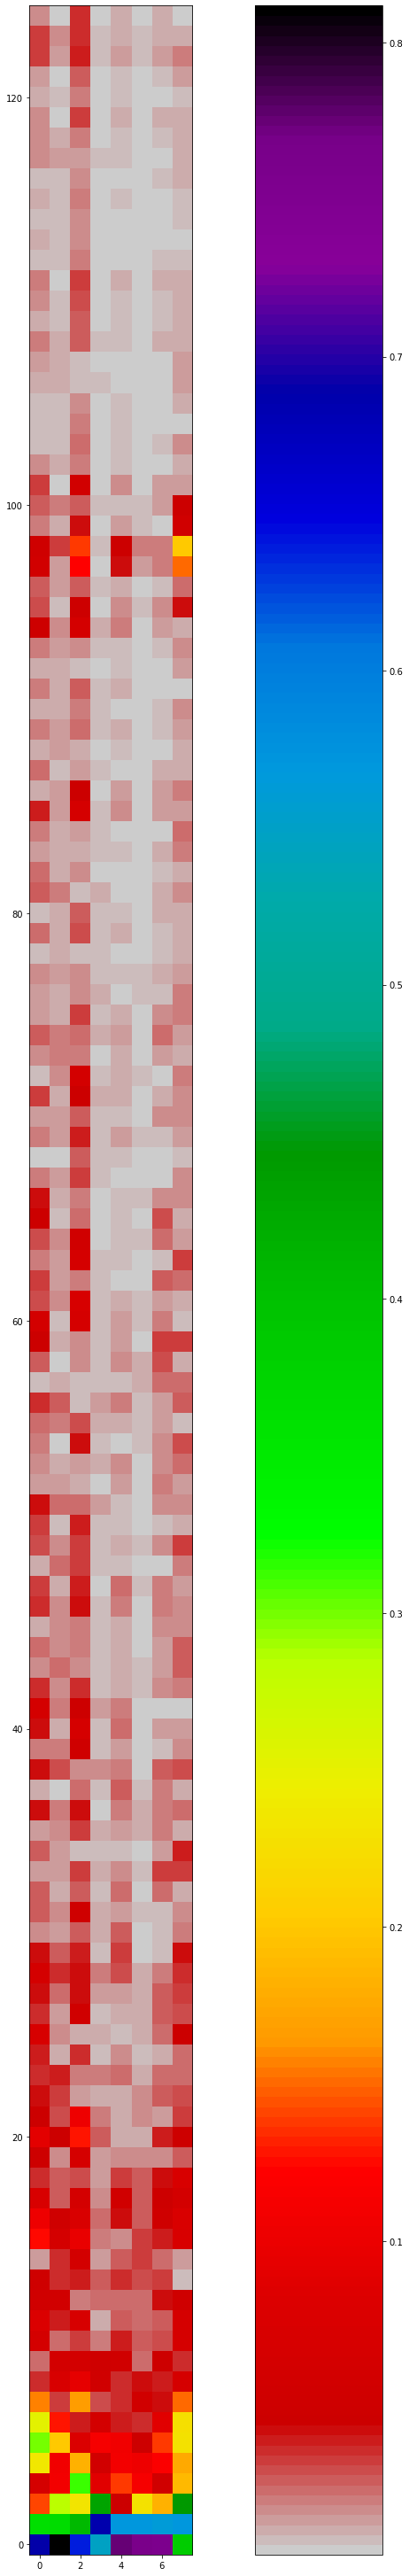

In [14]:
real=np.abs(finale[:,:,0])

normalized = normalize(real,axis=1)
normalized=normalized.T

print(normalized.shape)
plt.rcParams["figure.figsize"] = [20.00, 40.50]
plt.rcParams["figure.autolayout"] = True
data2D = normalized

im = plt.imshow(data2D, cmap="nipy_spectral_r", origin='lower')


plt.colorbar(im)
plt.show()

In [15]:
print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))

GPU name:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [16]:
#read in the data
neural_data = pd.read_csv('/content/drive/MyDrive/re-emote/finaldataset_withindex.csv',usecols=range(1,9))
#print(neural_data.shape)
#display(neural_data)
labels=df = open('/content/drive/MyDrive/re-emote/dataset/LabelList.txt', 'r')
scaler = StandardScaler()

labels=labels.read()
#print(labels)
list_labels=[]
for i in labels:
  try:
    int(i)
    list_labels.append(int(i))
  except:
    pass
labels=list_labels
labels=tf.keras.utils.to_categorical(np.array(labels)-1, num_classes = 3)
#print(labels)
#print(labels[0],'lablesssrwg')
#print(type(labels))
#print(len(labels))
#print(labels)

neural_data = scaler.fit_transform(neural_data)
#print(type(neural_data))
neural_images=tf.reshape(neural_data, [-1,1024,8])
print(tf.shape(neural_images))



#split the data into training and testing
aa=list(neural_images)
train_images, test_images,train_labels, test_labels = train_test_split(aa,labels, test_size=0.2,shuffle=True,random_state = 42)
#print(tf.convert_to_tensor(train_images).shape)
#print(type(train_labels))


train_labels=tf.convert_to_tensor(train_labels)
#print(train_labels)
#print(train_labels,'train labels')
#print(tf.shape(train_labels))


test_labels=tf.convert_to_tensor(test_labels)
#print(test_labels,'train label')
#print(tf.shape(test_labels))

train_features = tf.convert_to_tensor(train_images)
#print(type(train_features))
test_features = tf.convert_to_tensor(test_images)
#print(tf.shape(train_features),'fjkerogfnjjekognvdf')

tf.Tensor([3996 1024    8], shape=(3,), dtype=int32)


Epoch 1/15
100/100 [==============================] - 22s 163ms/step - loss: 1.1756 - accuracy: 0.5857 - val_loss: 0.8425 - val_accuracy: 0.6125
Epoch 2/15
100/100 [==============================] - 16s 155ms/step - loss: 0.8053 - accuracy: 0.6636 - val_loss: 0.7542 - val_accuracy: 0.6712
Epoch 3/15
100/100 [==============================] - 16s 158ms/step - loss: 0.6056 - accuracy: 0.7497 - val_loss: 0.7007 - val_accuracy: 0.7013
Epoch 4/15
100/100 [==============================] - 16s 158ms/step - loss: 0.4257 - accuracy: 0.8379 - val_loss: 0.6744 - val_accuracy: 0.7688
Epoch 5/15
100/100 [==============================] - 16s 160ms/step - loss: 0.2987 - accuracy: 0.8777 - val_loss: 0.6932 - val_accuracy: 0.7912
Epoch 6/15
100/100 [==============================] - 16s 159ms/step - loss: 0.2217 - accuracy: 0.9177 - val_loss: 0.6675 - val_accuracy: 0.7900
Epoch 7/15
100/100 [==============================] - 16s 161ms/step - loss: 0.1810 - accuracy: 0.9321 - val_loss: 0.8147 - val_ac

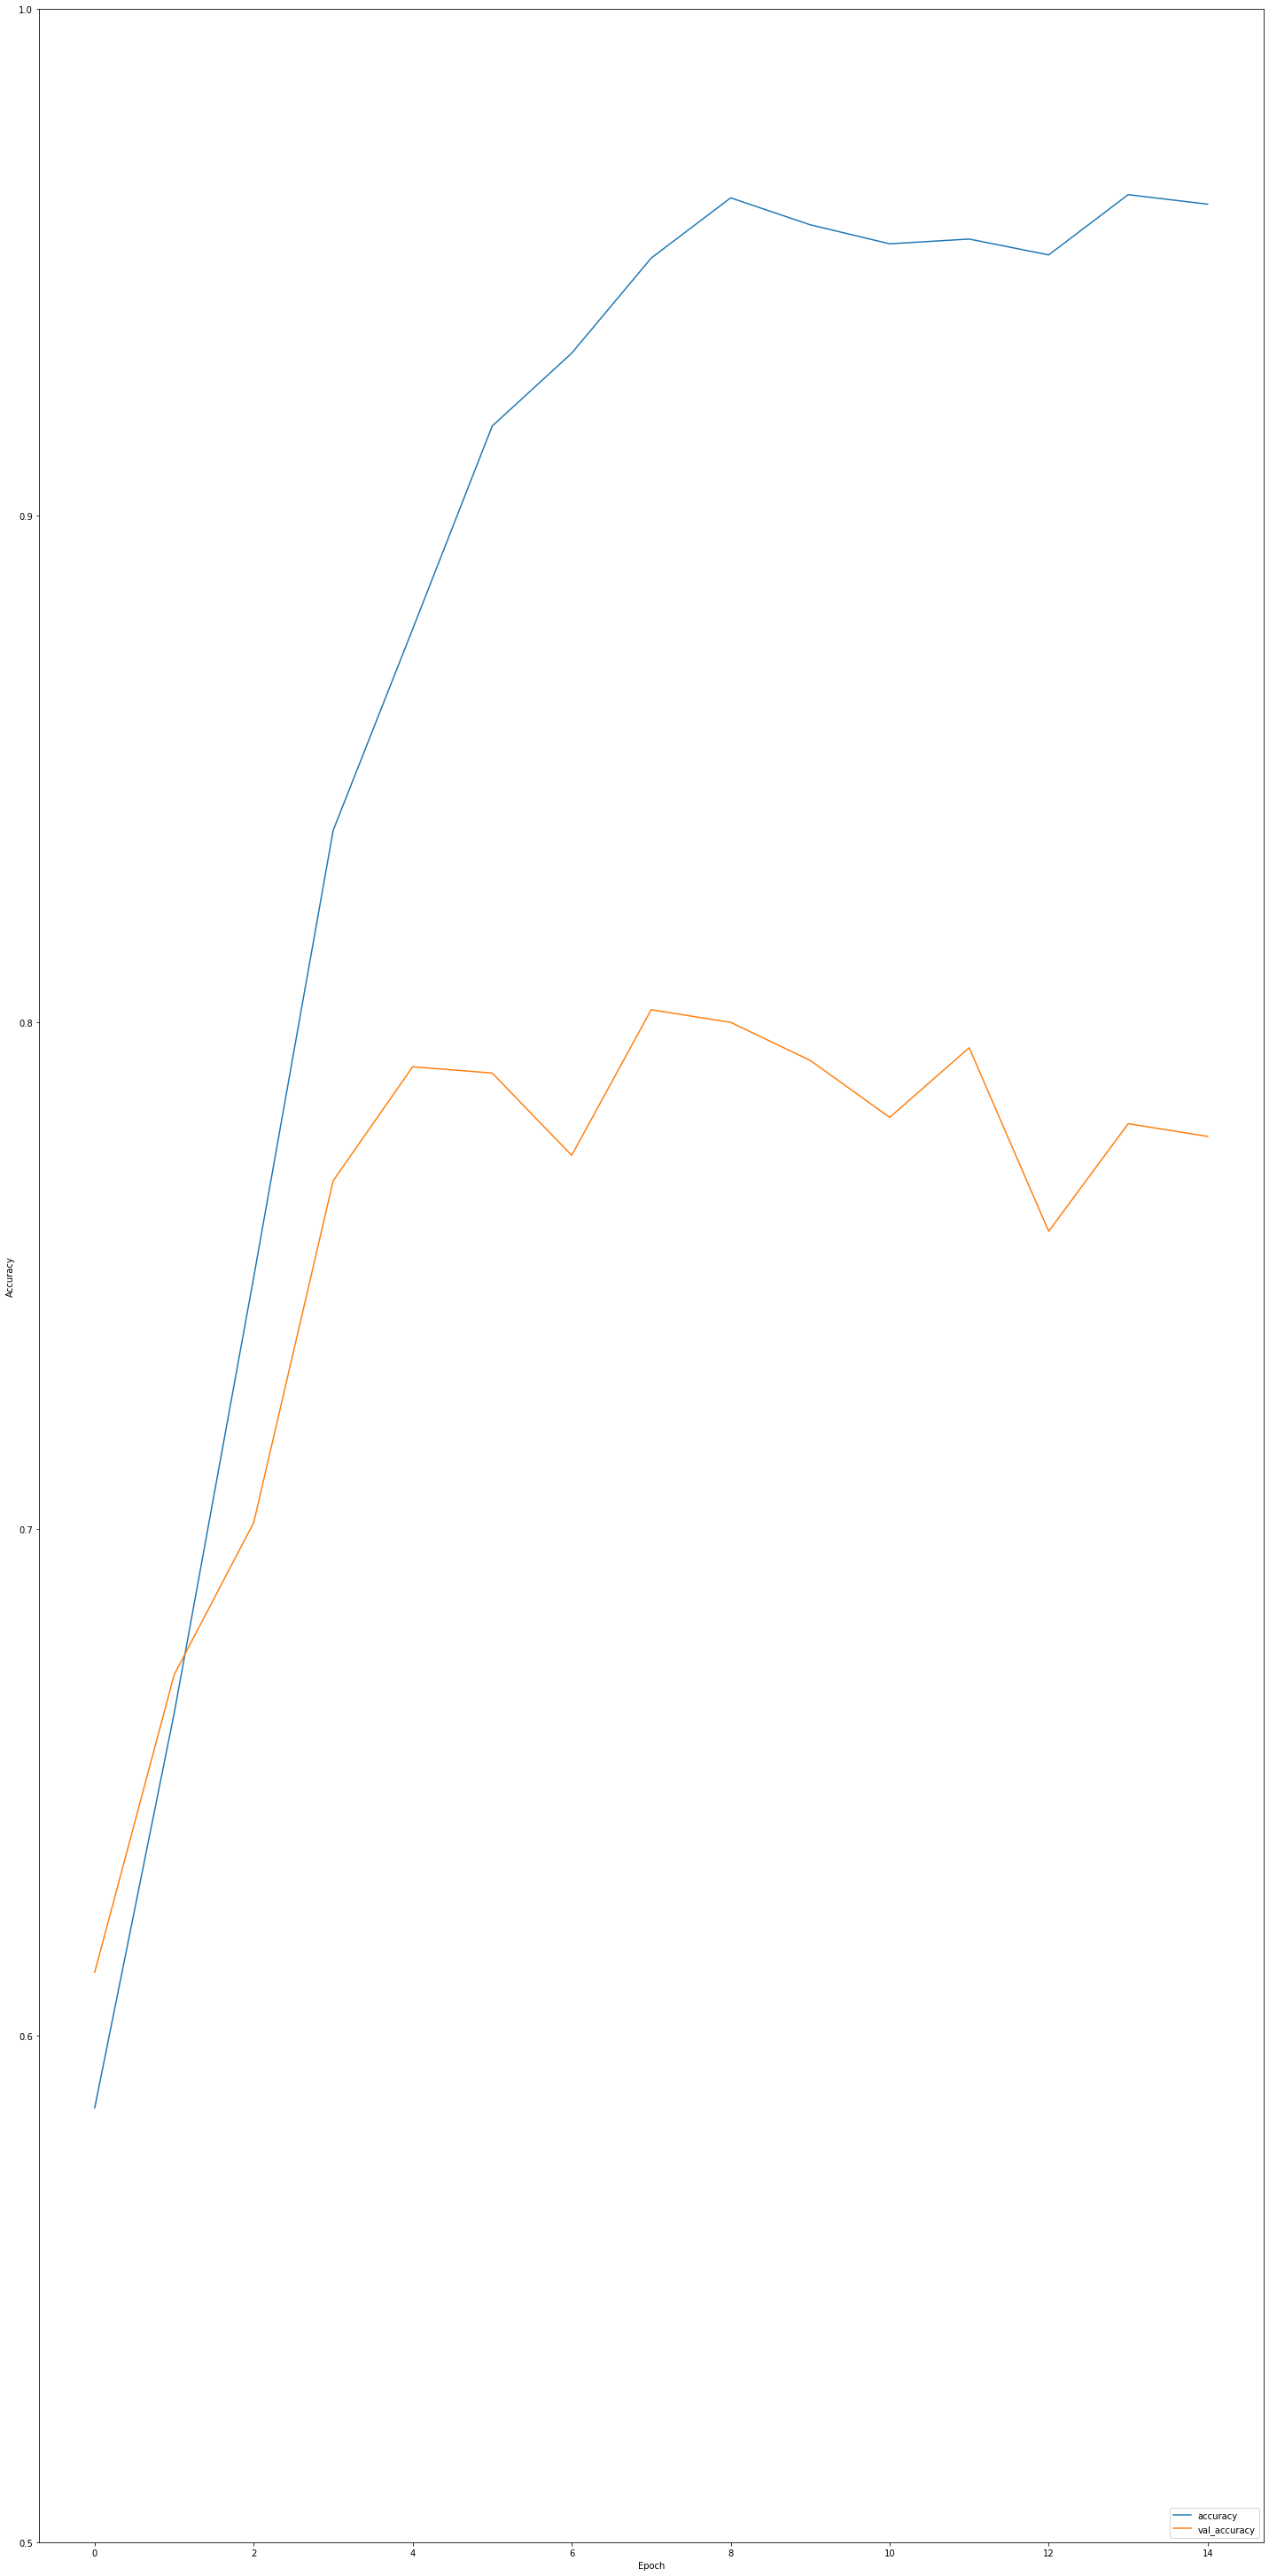

In [ ]:


#build the convolutional model
model = keras.Sequential([
    layers.Conv2D(12, kernel_size=(12, 1), activation=tf.nn.gelu, input_shape=(1024, 8,1),padding="same"),
    layers.AveragePooling2D(pool_size=(4, 1), strides=(4, 1), padding="same"),
    layers.Conv2D(250, kernel_size=(12, 1), activation=tf.nn.gelu,padding='same'),
    layers.AveragePooling2D(pool_size=(2, 1), strides=(2, 1),padding="same"),

    layers.Flatten(),
    layers.Dense(2000, activation=tf.nn.gelu),
    layers.Dropout(0.2),
    layers.Dense(1000, activation=tf.nn.gelu),
    layers.Dropout(0.2),
    layers.Dense(700, activation=tf.nn.gelu),
    layers.Dense(3, activation='softmax')

])


#compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

#train the model
history = model.fit(
    train_features, train_labels,
    validation_data=(test_features, test_labels),
    epochs=15,
    shuffle=True,
    #callbacks=[WandbCallback()]
)

#plot the results
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.show()

In [ ]:
print(train_features.shape)
print(test_features.shape)


(3196, 1024, 8)
(800, 1024, 8)


In [ ]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('model.h5')

In [ ]:
model.summary()

In [ ]:
for i in range(10):
    model.layers[i].trainable = False

In [ ]:
(model.layers[12])

In [ ]:
ll = model.layers[14].output
ll = layers.Dense(64)(ll)
ll = layers.Dropout(0.3)(ll)
ll = layers.Dense(32)(ll)
ll = layers.Dense(3,activation="softmax")(ll)

new_model = tf.keras.Model(inputs=model.input,outputs=ll)

In [ ]:
neural_data = pd.read_csv('/content/drive/MyDrive/re-emote/dataregister.csv',usecols=range(1,9))
display(neural_data)
#print(neural_data.shape)
#display(neural_data)
labels=df = open('/content/drive/MyDrive/re-emote/312 (1).txt', 'r')
scaler = StandardScaler()

labels=labels.read()
#print(labels)
list_labels=[]
for i in labels:
  try:
    int(i)
    list_labels.append(int(i))
  except:
    pass
labels=list_labels
labels=tf.keras.utils.to_categorical(np.array(labels)-1, num_classes = 3)
print(labels)
#print(labels[0],'lablesssrwg')
#print(type(labels))
#print(len(labels))

neural_data = scaler.fit_transform(neural_data)
#print(type(neural_data))
neural_images=tf.reshape(neural_data, [-1,1024,8])
print(tf.shape(neural_images))



#split the data into training and testing
aa=list(neural_images)
train_images, test_images,train_labels, test_labels = train_test_split(aa,labels, test_size=0.2,shuffle=True,random_state=42)
#print(tf.convert_to_tensor(train_images).shape)
print(type(train_labels))


train_labels=tf.convert_to_tensor(train_labels)
#print(train_labels,'train labels')
#print(tf.shape(train_labels))


test_labels=tf.convert_to_tensor(test_labels)
#print(test_labels,'train label')
#print(tf.shape(test_labels))

train_features = tf.convert_to_tensor(train_images)
print(type(train_features))
test_features = tf.convert_to_tensor(test_images)

In [ ]:
#compile the model
new_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

history = new_model.fit(
    train_features, train_labels,
    validation_data=(test_features, test_labels),
    epochs=13,
    shuffle=True
)
#plot the results
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

plt.show()

In [ ]:
https://towardsdatascience.com/fantastic-activation-functions-and-when-to-use-them-481fe2bb2bde